In [67]:
import plotly.graph_objects as go
import pandas as pd
from pymatgen.core.periodic_table import Element, _pt_data
# Define periodic table data
def get_period(el):
    if el.is_actinoid or el.is_lanthanoid:
        return el.row + 3
    return el.row 

def get_group(el):
    if el.is_actinoid:
        return el.group + el.Z - 89
    if el.is_lanthanoid:
        return el.group + el.Z - 57
    return el.group

def get_category(el):
    if el.Z > 92:
        return "transuranic"
    for cat in ["alkali", "alkaline", "actinoid", "lanthanoid", "halogen", "noble_gas", "metal", "chalcogen"]:
        if getattr(el, f"is_{cat}"):
            return cat
    return ""
    
df = pd.DataFrame([{"Symbol": el.symbol, "Name": el.long_name, "AtomicNumber": el.Z, "Group": get_group(el), "Period": get_period(el), "Category": get_category(el)} for el in Element])

In [ ]:

data = {
    "Symbol": [
        "H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", "Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar",
        "K", "Ca", "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", "Kr"
    ],
    "Name": [
        "Hydrogen", "Helium", "Lithium", "Beryllium", "Boron", "Carbon", "Nitrogen", "Oxygen", "Fluorine", "Neon",
        "Sodium", "Magnesium", "Aluminium", "Silicon", "Phosphorus", "Sulfur", "Chlorine", "Argon",
        "Potassium", "Calcium", "Scandium", "Titanium", "Vanadium", "Chromium", "Manganese", "Iron", "Cobalt",
        "Nickel", "Copper", "Zinc", "Gallium", "Germanium", "Arsenic", "Selenium", "Bromine", "Krypton"
    ],
    "AtomicNumber": [
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 
        31, 32, 33, 34, 35, 36
    ],
    "Group": [
        1, 18, 1, 2, 13, 14, 15, 16, 17, 18, 1, 2, 13, 14, 15, 16, 17, 18, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 
        14, 15, 16, 17, 18
    ],
    "Period": [
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4
    ],
    "Category": [
        "Nonmetal", "Noble gas", "Alkali metal", "Alkaline earth metal", "Metalloid", "Nonmetal", "Nonmetal", "Nonmetal",
        "Halogen", "Noble gas", "Alkali metal", "Alkaline earth metal", "Post-transition metal", "Metalloid", "Nonmetal",
        "Nonmetal", "Halogen", "Noble gas", "Alkali metal", "Alkaline earth metal", "Transition metal", "Transition metal",
        "Transition metal", "Transition metal", "Transition metal", "Transition metal", "Transition metal", 
        "Transition metal", "Transition metal", "Transition metal", "Post-transition metal", "Metalloid", "Metalloid",
        "Nonmetal", "Halogen", "Noble gas"
    ]
}

In [30]:
Element.H.is_

False

18

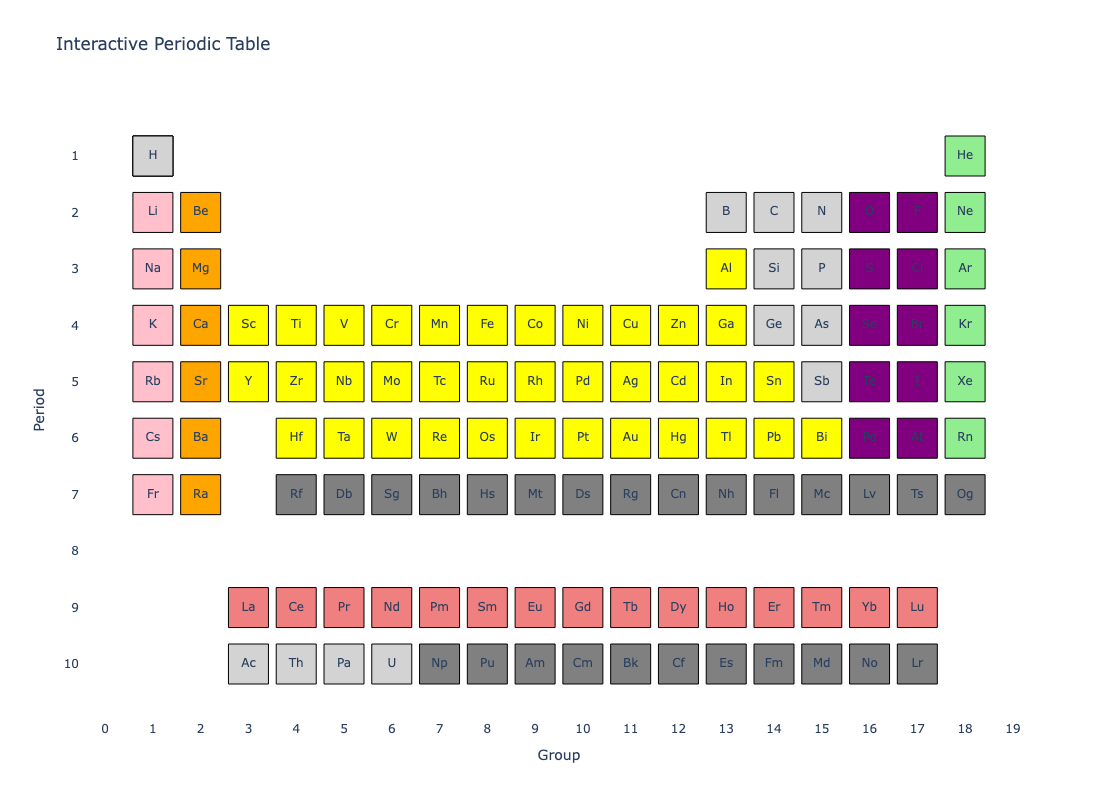

In [68]:
# Define color mapping for categories
category_colors = {
    "metalloid": "lightblue",
    "noble_gas": "lightgreen",
    "alkali": "pink",
    "alkaline": "orange",
    "metal": "yellow",
    "chalcogen": "purple",
    "halogen": "purple",
    "actinoid": "lightgray",
    "lanthanoid": "lightcoral",
    'transuranic': "grey",
    "": "lightgrey"
}

# Create hover text for each element
df["HoverText"] = df.apply(
    lambda row: f"Name: {row['Name']}<br>Atomic Number: {row['AtomicNumber']}",
    axis=1
)

# Create the plot
fig = go.Figure()

for _, row in df.iterrows():
    fig.add_trace(
        go.Scatter(
            x=[row["Group"]],
            y=[row["Period"]],
            mode="markers+text",
            marker=dict(
                symbol='square',
                size=40,
                color=category_colors[row["Category"]],
                line=dict(color="black", width=1)
            ),
            text=row["Symbol"],
            #textposition="center",
            hovertext=row["HoverText"],
            hoverinfo="text"
        )
    )

# Update layout
fig.update_layout(
    title="Interactive Periodic Table",
    xaxis=dict(title="Group", dtick=1),
    yaxis=dict(title="Period", dtick=1, autorange="reversed"),
    showlegend=False,
    plot_bgcolor="white",
    width=1200,
    height=800,
)

# Show the plot
fig.show()

In [61]:
Element.P.is_

False

In [25]:
print(df.to_string())

    Symbol Name  AtomicNumber  Group  Period                       HoverText
0        H    H             1      1       1     Name: H<br>Atomic Number: 1
1        H    D             1      1       1     Name: D<br>Atomic Number: 1
2        H    T             1      1       1     Name: T<br>Atomic Number: 1
3       He   He             2     18       1    Name: He<br>Atomic Number: 2
4       Li   Li             3      1       2    Name: Li<br>Atomic Number: 3
5       Be   Be             4      2       2    Name: Be<br>Atomic Number: 4
6        B    B             5     13       2     Name: B<br>Atomic Number: 5
7        C    C             6     14       2     Name: C<br>Atomic Number: 6
8        N    N             7     15       2     Name: N<br>Atomic Number: 7
9        O    O             8     16       2     Name: O<br>Atomic Number: 8
10       F    F             9     17       2     Name: F<br>Atomic Number: 9
11      Ne   Ne            10     18       2   Name: Ne<br>Atomic Number: 10